## PCC57 - Analyze Olympic Games Data With Pandas

Quick and dirty submission for the one hour I could dedicate to this now.

Challenge: https://codechalleng.es/challenges/57/

Data: https://www.kaggle.com/the-guardian/olympic-games -> summer.csv

TODOs:
- merge countries to match the top 10 countries per gender as under 2. in the challenge (= RUS + URS and GER + GDR) 
- potentially filter dataset for year < 2012
- more plots

This post helped me greatly picking up Pandas again: https://pybit.es/guest-marvel-data-analysis.html

In [1]:
import pandas as pd

%matplotlib inline

In [13]:
# copied data over so I don't have to include the csv in the repo, yet this would work
df = pd.read_csv('http://projects.bobbelderbos.com/data/summer.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [4]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
df.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [6]:
athletes = df.groupby(df['Athlete'])['Medal'].count().reset_index()

In [7]:
athletes.head()

,Athlete,Medal
0,"AABYE, Edgar",1
1,"AALTONEN, Arvo Ossian",2
2,"AALTONEN, Paavo Johannes",5
3,"AAMODT, Ragnhild",1
4,"AANING, Alf Lied",1


In [8]:
athletes.sort_values(by=['Medal']).tail(2)

,Athlete,Medal
11202,"LATYNINA, Larisa",18
15702,"PHELPS, Michael",22


In [9]:
men = df.query('Gender == "Men"').groupby(df['Country'])['Medal'].count().reset_index()
men_top10 = men.sort_values(by=['Medal']).tail(10)
men_top10

,Country,Medal
68,JPN,525
6,AUS,696
56,HUN,834
48,GER,916
116,SWE,953
66,ITA,1161
42,FRA,1254
45,GBR,1412
132,URS,1476
134,USA,3208


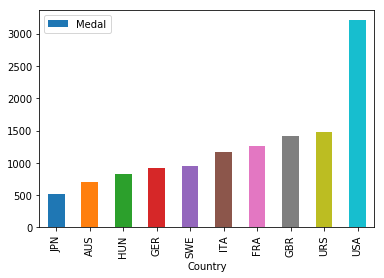

In [10]:
men_top10.plot(kind='bar', x='Country', y='Medal')

In [11]:
women = df.query('Gender == "Women"').groupby(df['Country'])['Medal'].count().reset_index()
women_top10 = women.sort_values(by=['Medal']).tail(10)
women_top10

,Country,Medal
32,GBR,308
67,ROU,335
59,NED,356
69,RUS,359
33,GDR,369
35,GER,389
3,AUS,493
15,CHN,537
87,URS,573
88,USA,1377


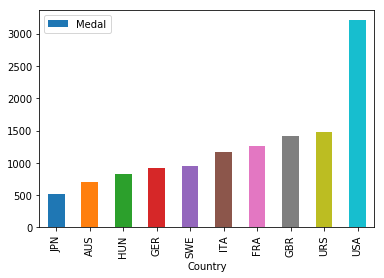

In [12]:
men_top10.plot(kind='bar', x='Country', y='Medal')